In [12]:
import os
import numpy as np
import h5py 
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

In [3]:
path = r'C:\Users\ricca\Desktop\MAGISTRALE\QTLab2324\DATA ANALYSIS\OPTIMUM\DATA\\'
noises, signals = [], []   

In [73]:
for filename in os.walk(path):
    for file in filename[2]:
        print(file)
        with h5py.File(path+file,'r') as file:
            for key in file.keys():
                if 'Noise' in key:
                    noises.append(np.array(file[key][:]))
                elif 'Raw' in key:
                    signals.append(np.array(file[key][:])[:20000])

data12Cq--BfZONfpXNnzqw1xnwpKd4HLN5QY.hdf5
data19y3UZN5FfFp0G1GCUJGydX3f8oTiwivq.hdf5
data1EZwnzFDOlW20t1Ufkj66OG_oNNCVGLGK.hdf5
data1yYLE5oZD8xLRU-p8sOcruevWP0dqUzAT.hdf5


In [74]:
timestamp = np.linspace(0,len(signals[1]),len(signals[1]))
data = signals[1]

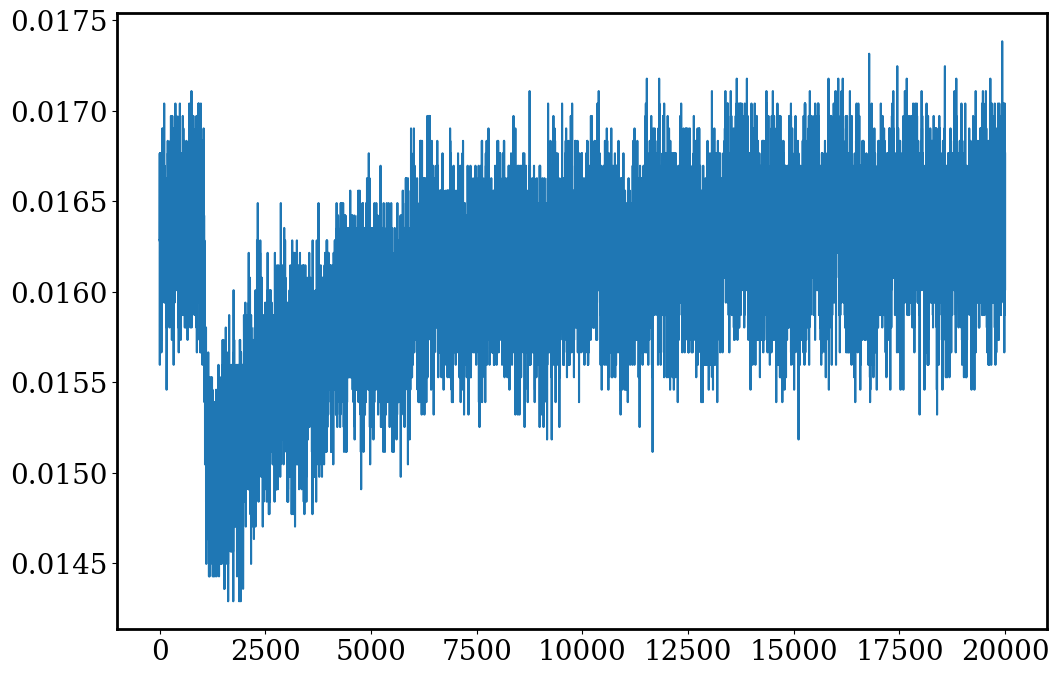

In [75]:
plt.plot(timestamp, data)

In [76]:
window_size = np.arange(20,200,20, dtype=int)  # Size of the moving average window
cumsum = np.cumsum(data)

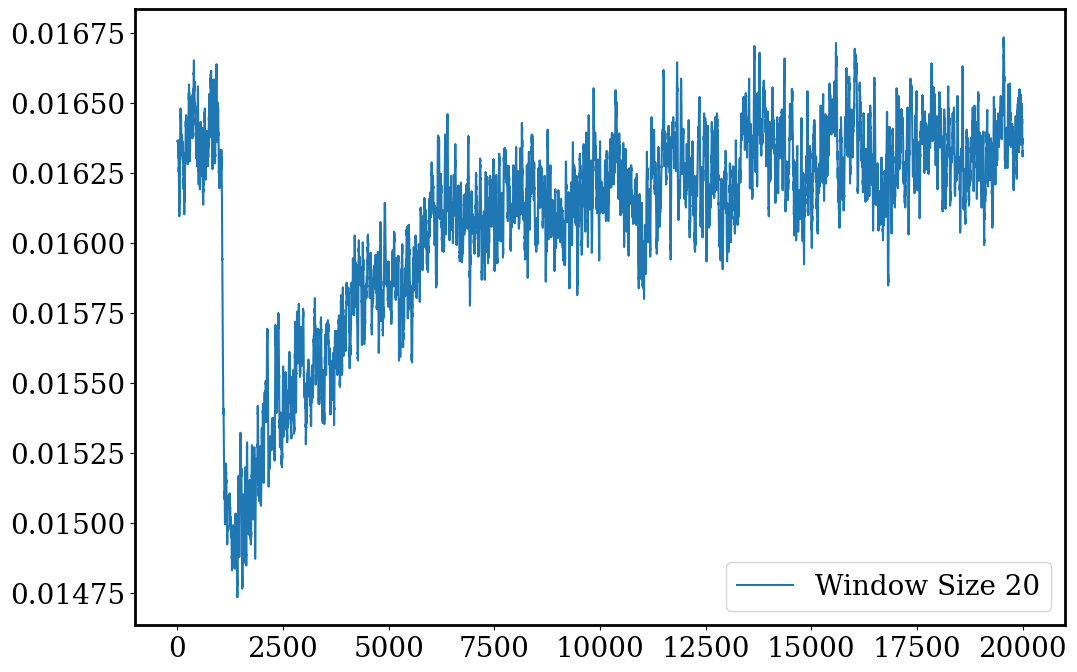

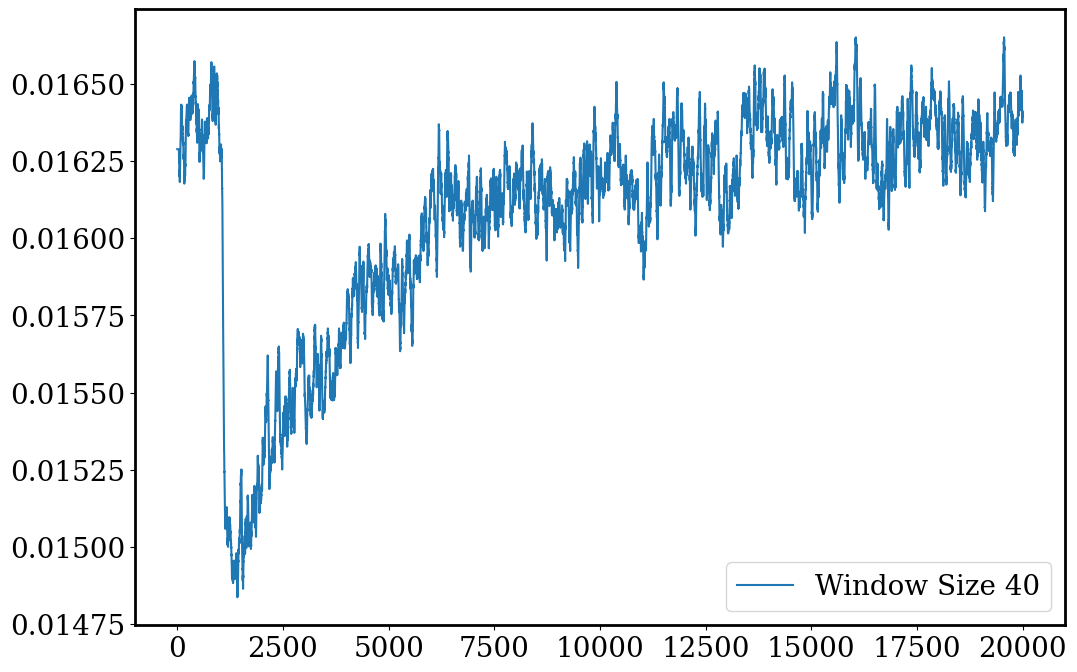

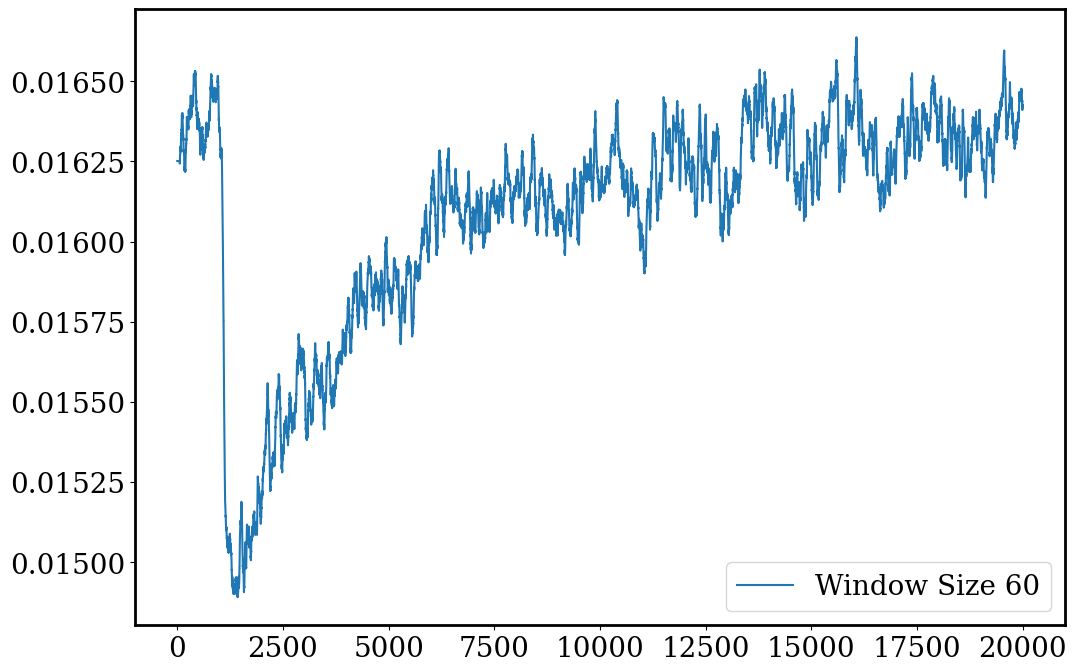

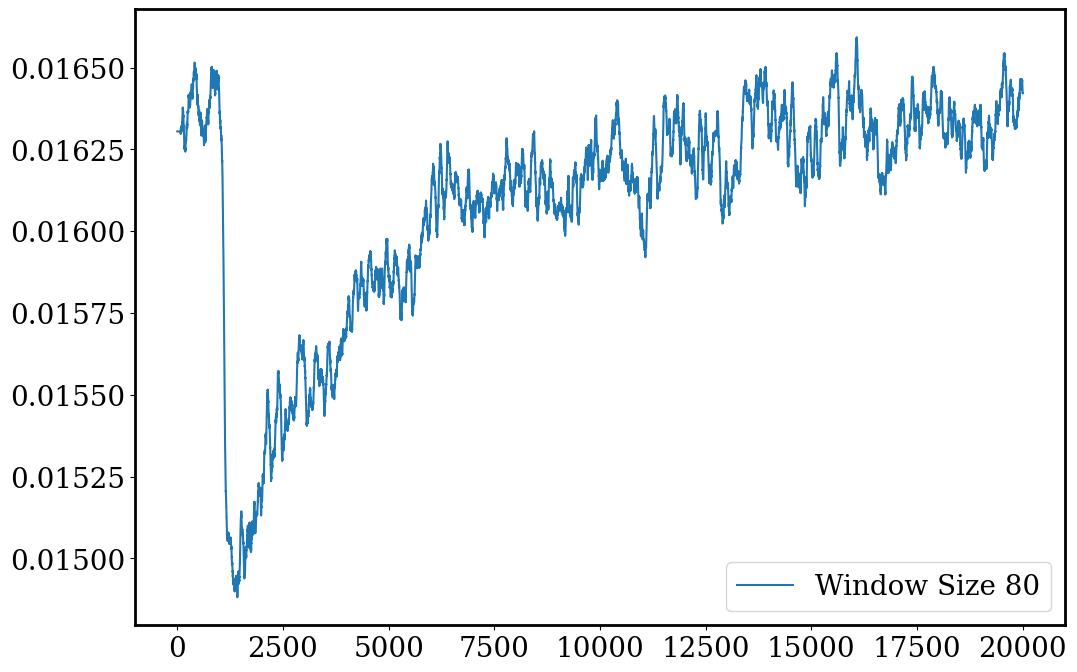

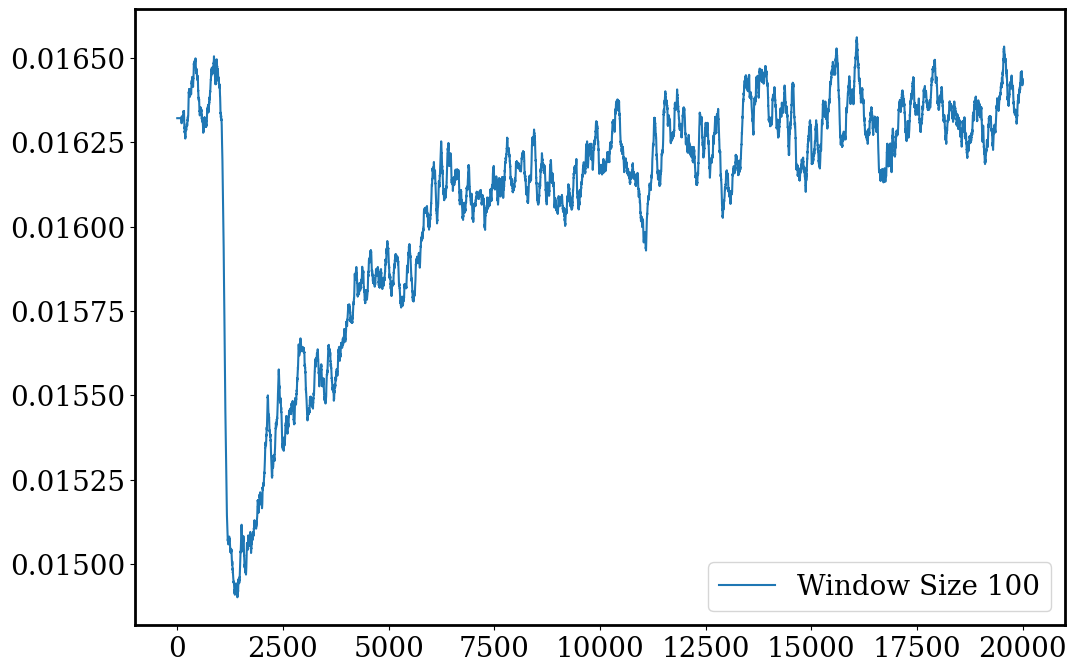

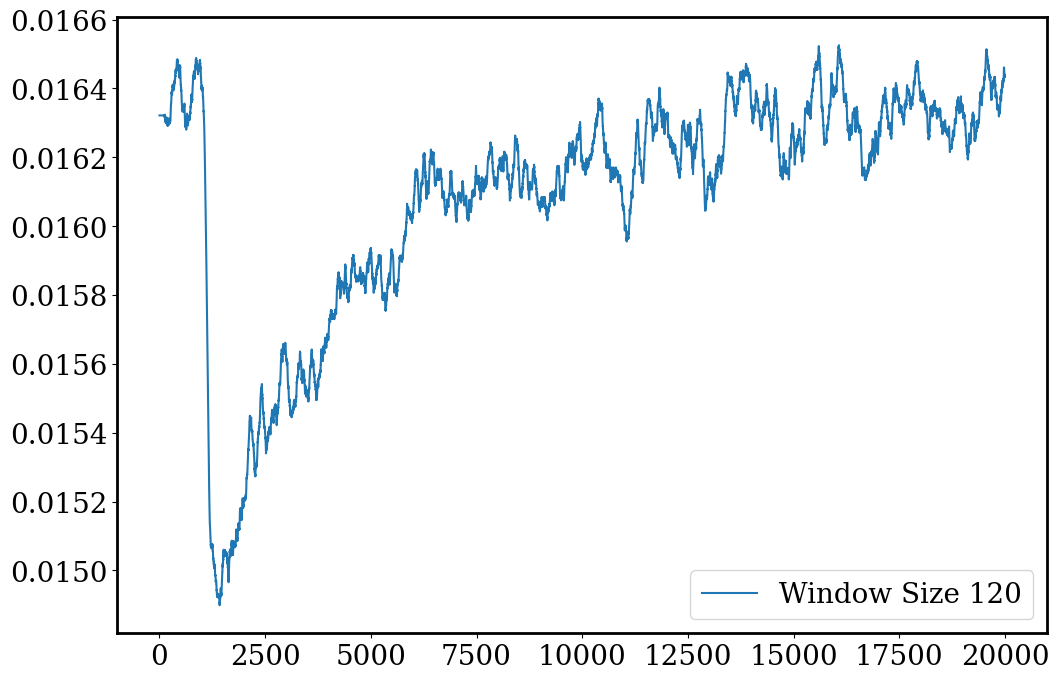

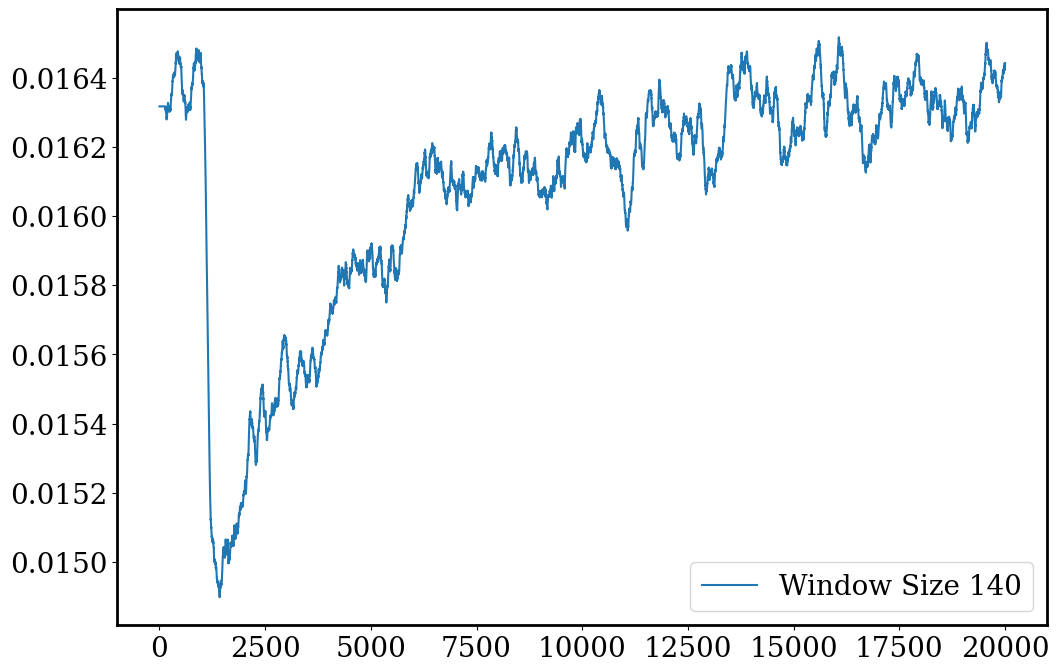

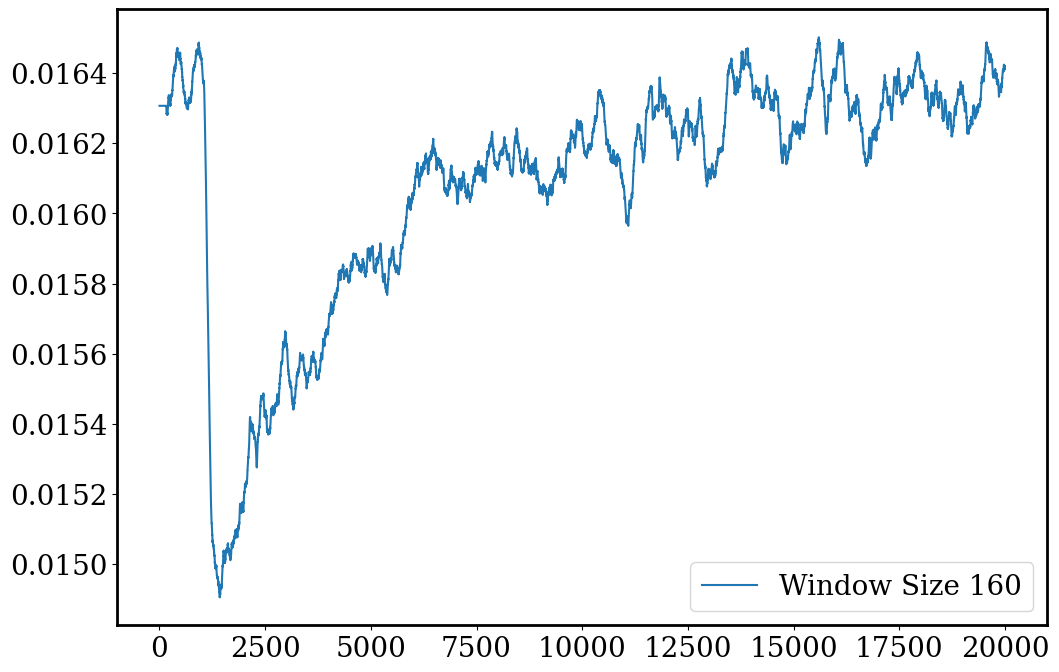

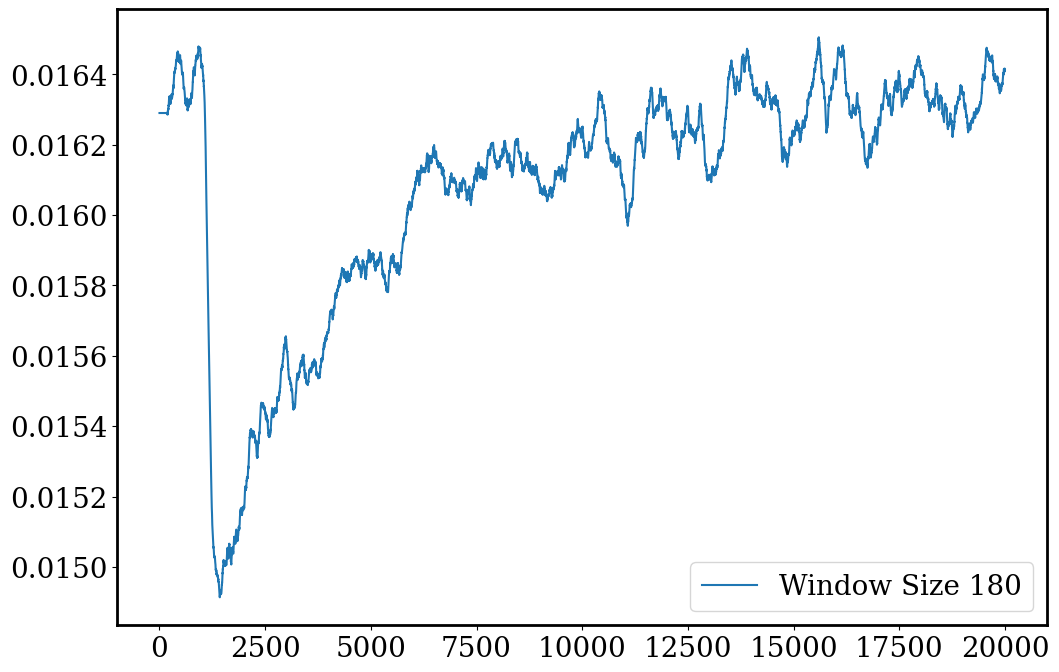

In [77]:
for win in window_size:
    # Calculate cumulative sum
    cumsum = np.cumsum(data)
    
    # Calculate moving average
    moving_avg = np.array((cumsum[win:] - cumsum[:-win]) / win)
    
    # Pad the moving average to match the original data length
    moving_avg = np.pad(moving_avg, (win - 1, 0), mode='constant', constant_values=(moving_avg[0], moving_avg[-1]))
    
    # Create time axis for plotting
    time = np.linspace(0, len(moving_avg), len(moving_avg))
    
    # Plot the moving average
    plt.plot(time, moving_avg, label=f'Window Size {win}')
    plt.legend()
    plt.show()


In [78]:
from scipy.signal import savgol_filter

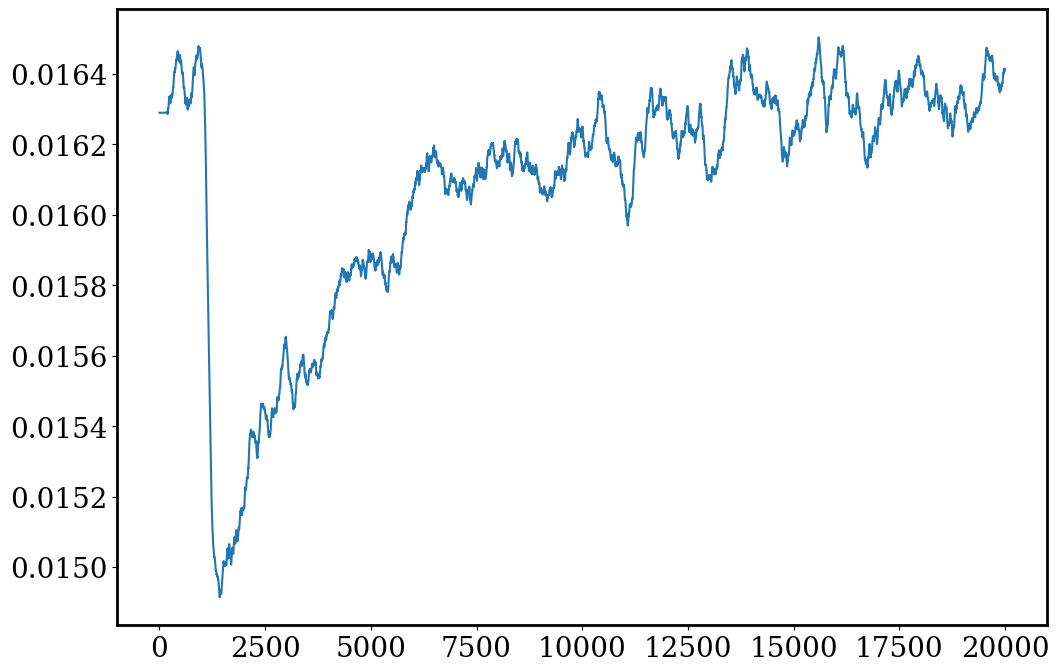

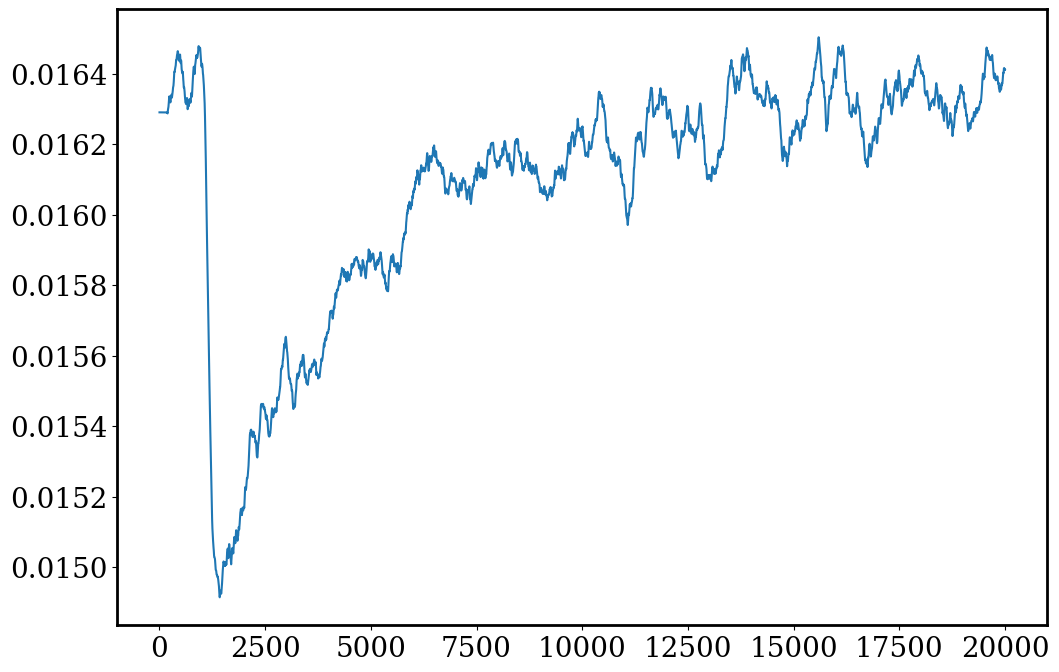

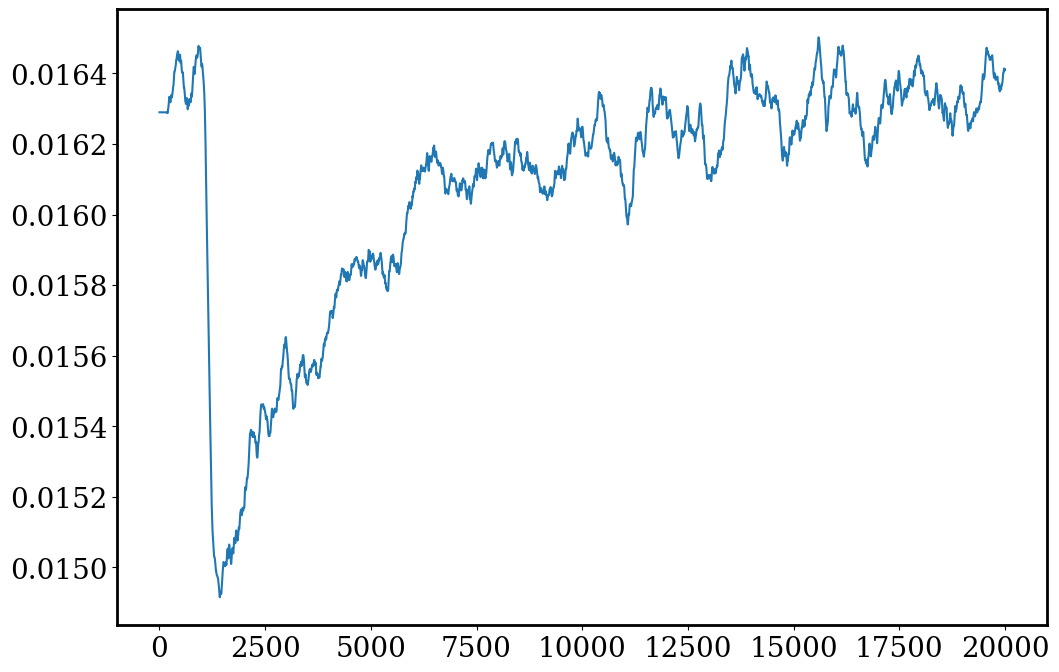

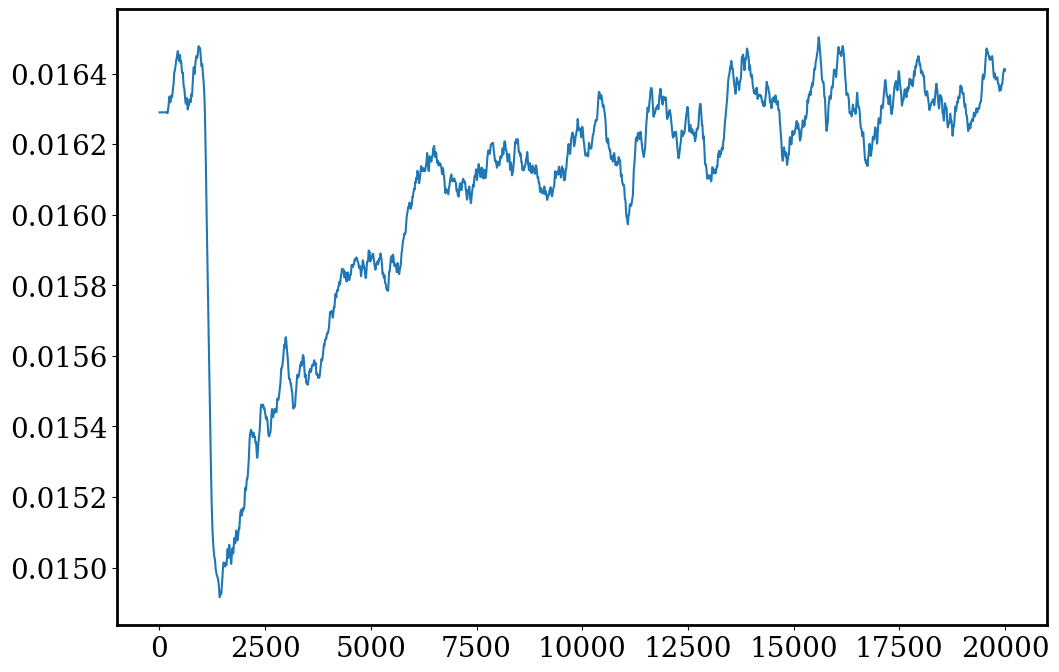

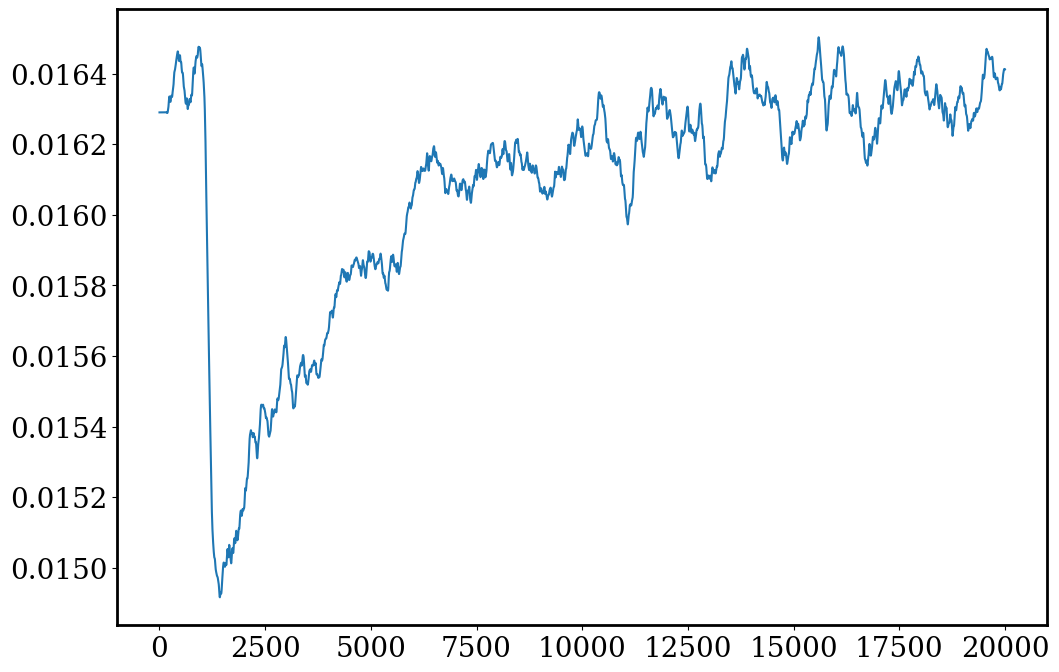

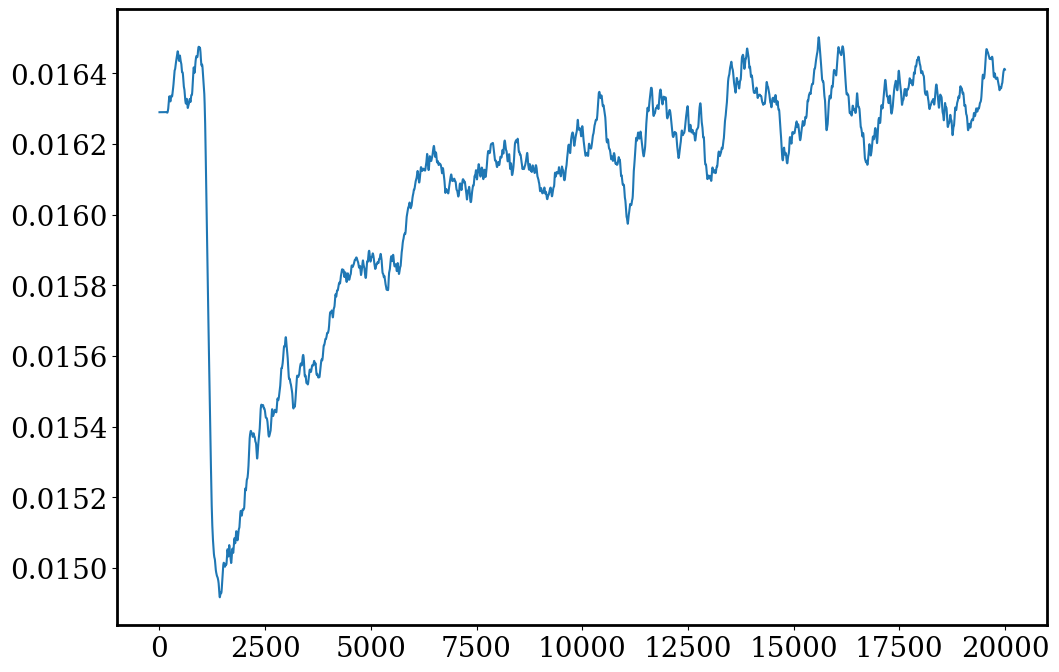

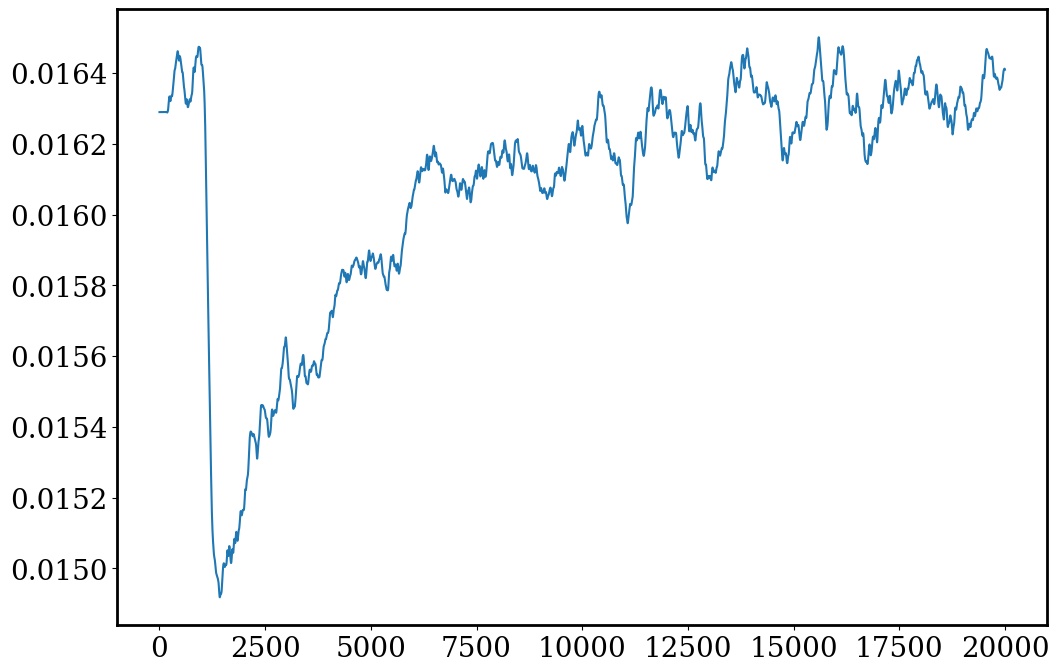

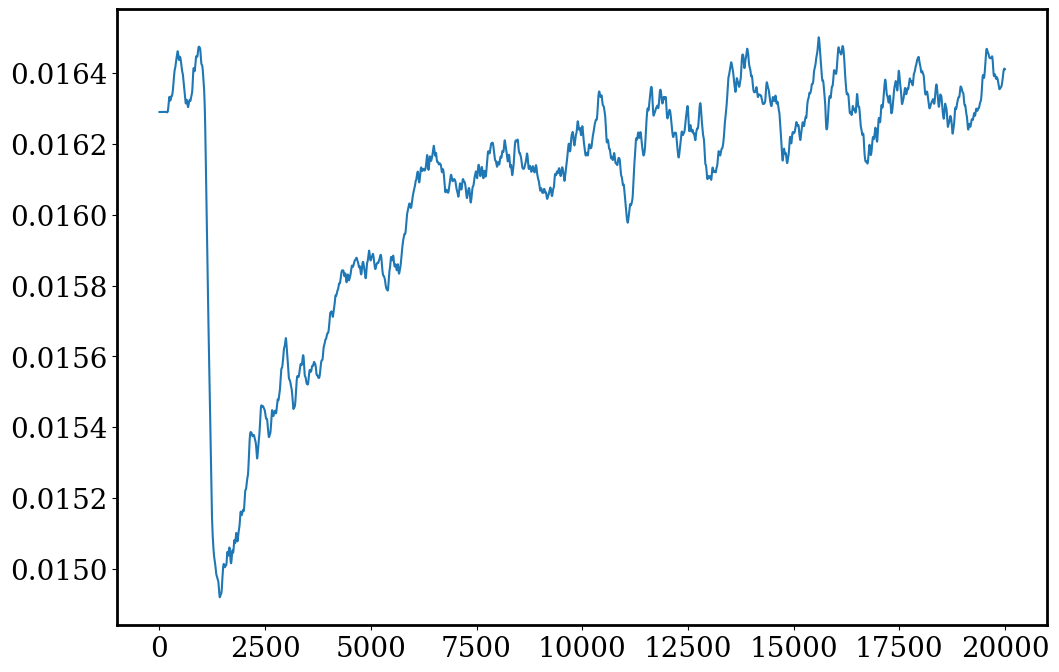

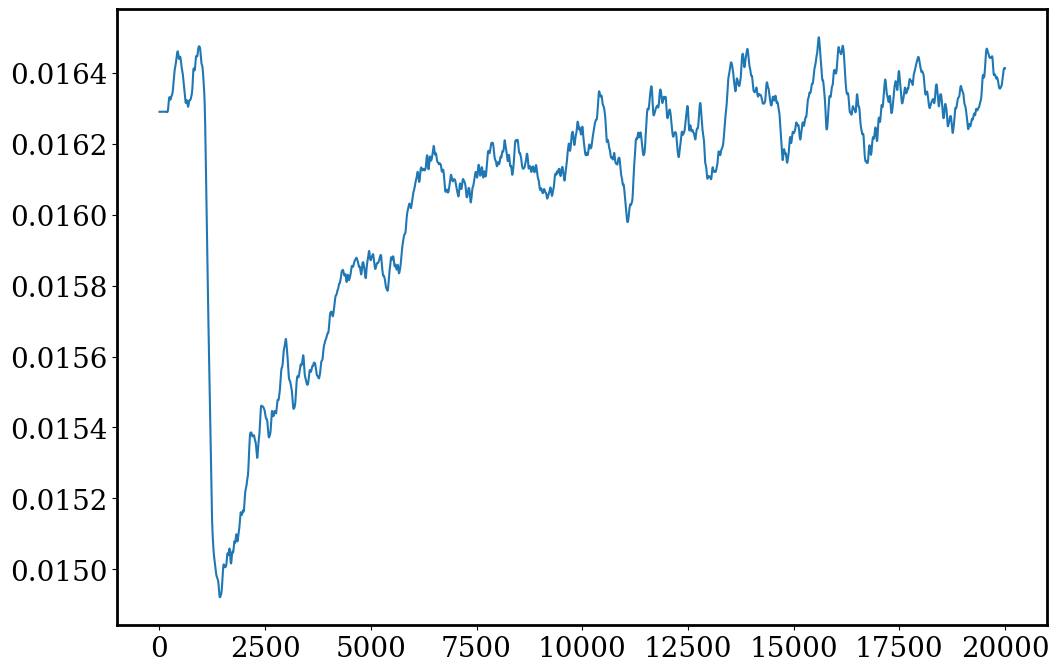

In [79]:
polyorder = 5
sav_size = np.arange(10,100,10)
for sav in sav_size:
    sg_filtered_signal = savgol_filter(moving_avg, sav, polyorder)
    plt.plot(np.linspace(0,len(sg_filtered_signal),len(sg_filtered_signal)),sg_filtered_signal)
    plt.show()

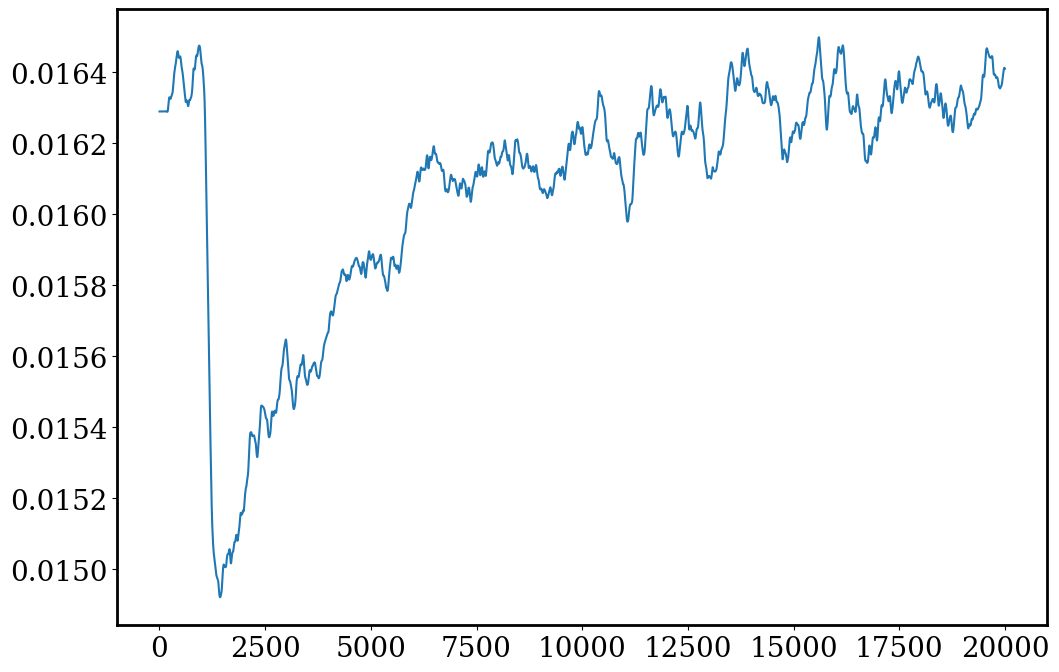

In [80]:

window_size = 100  # Size of the moving average window
cumsum = np.cumsum(data)
moving_avg = np.array((cumsum[win:] - cumsum[:-win]) / win)
moving_avg = np.pad(moving_avg, (win - 1, 0), mode='constant', constant_values=(moving_avg[0], moving_avg[-1]))


polyorder = 5
sav_size = 100
sg_filtered_signal = savgol_filter(moving_avg, sav_size, polyorder)
plt.plot(np.linspace(0,len(sg_filtered_signal),len(sg_filtered_signal)),sg_filtered_signal)
plt.show()


In [87]:
st = savgol_filter(sg_filtered_signal,100,5,1)

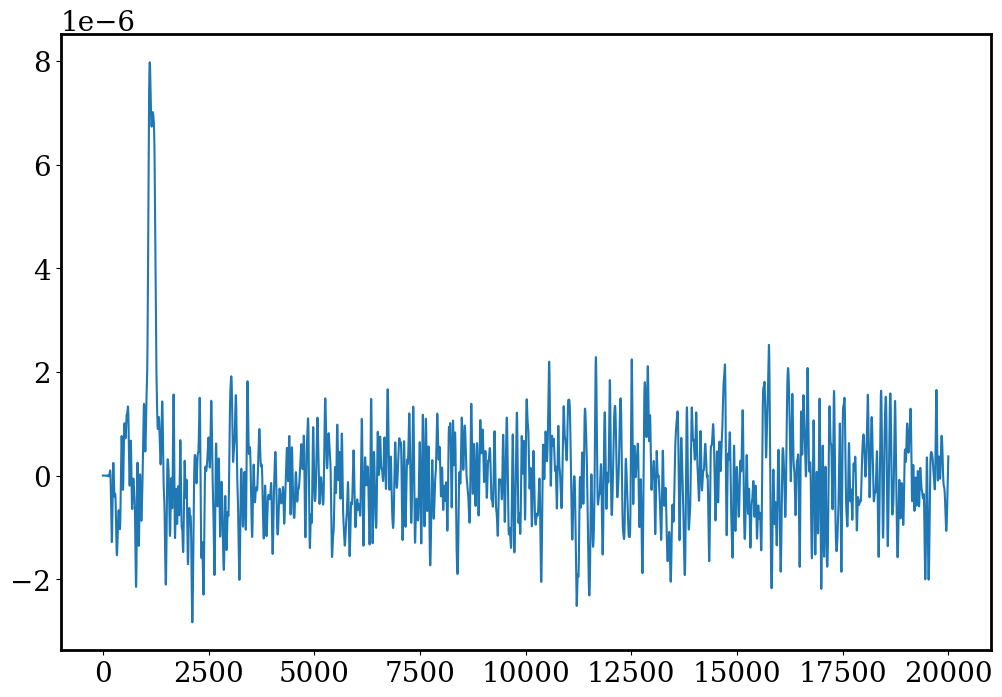

In [88]:
plt.plot(np.linspace(0,len(st),len(st)),-st)


In [89]:
from scipy.signal import find_peaks

In [137]:
peaks, props = find_peaks(-st,height=7*1e-6)

In [138]:
print(peaks)

[1109 1181]


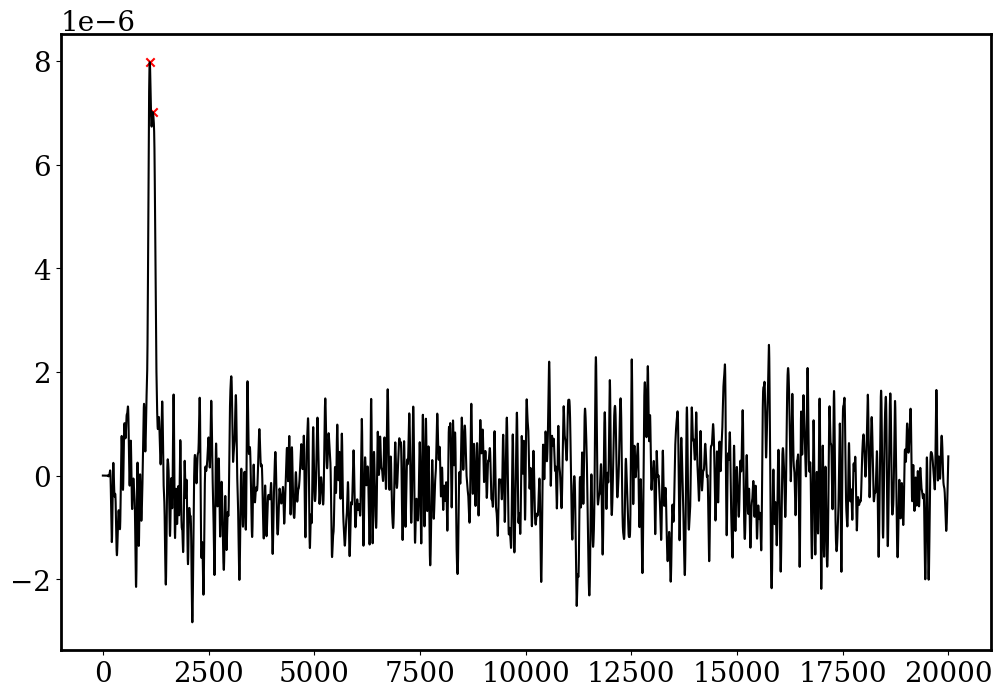

In [139]:
plt.plot(np.linspace(0,len(st),len(st)),-st, color='black')
plt.scatter(peaks,props['peak_heights'], marker='x', color='red')

In [171]:
for data in signals:
    
    window_size = 100  # Size of the moving average window
    cumsum = np.cumsum(data)
    moving_avg = np.array((cumsum[win:] - cumsum[:-win]) / win)
    moving_avg = np.pad(moving_avg, (win - 1, 0), mode='constant', constant_values=(moving_avg[0], moving_avg[-1]))
    polyorder = 5
    sav_size = 100
    sg_filtered_signal = savgol_filter(moving_avg, sav_size, polyorder)
    st = savgol_filter(sg_filtered_signal,100,5,1)
    sd = savgol_filter(sg_filtered_signal,100,5,2)
    #peaks, props = find_peaks(-st, 7*1e-6)
    ymin1 = max(st)
    ymin2 = max(sd)
    with open ('peaks.txt','a') as f:
        try:
            #ymin = min(props['peak_heights'])
            #xmin = peaks[np.argmin(props['peak_heights'])]
            f.writelines(str(ymin1)+'\t'+str(ymin2)+'\n')
        except Exception:
            pass



In [172]:
peaks1 = -1*np.genfromtxt('peaks.txt')[:,0]
peaks2 = -1*np.genfromtxt('peaks.txt')[:,1]

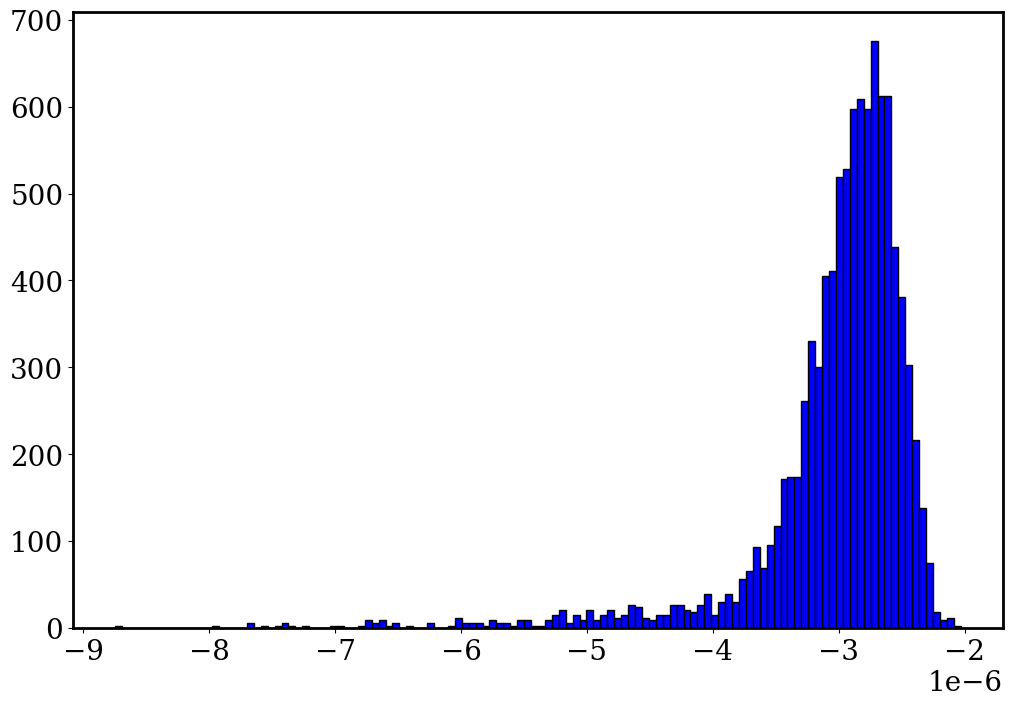

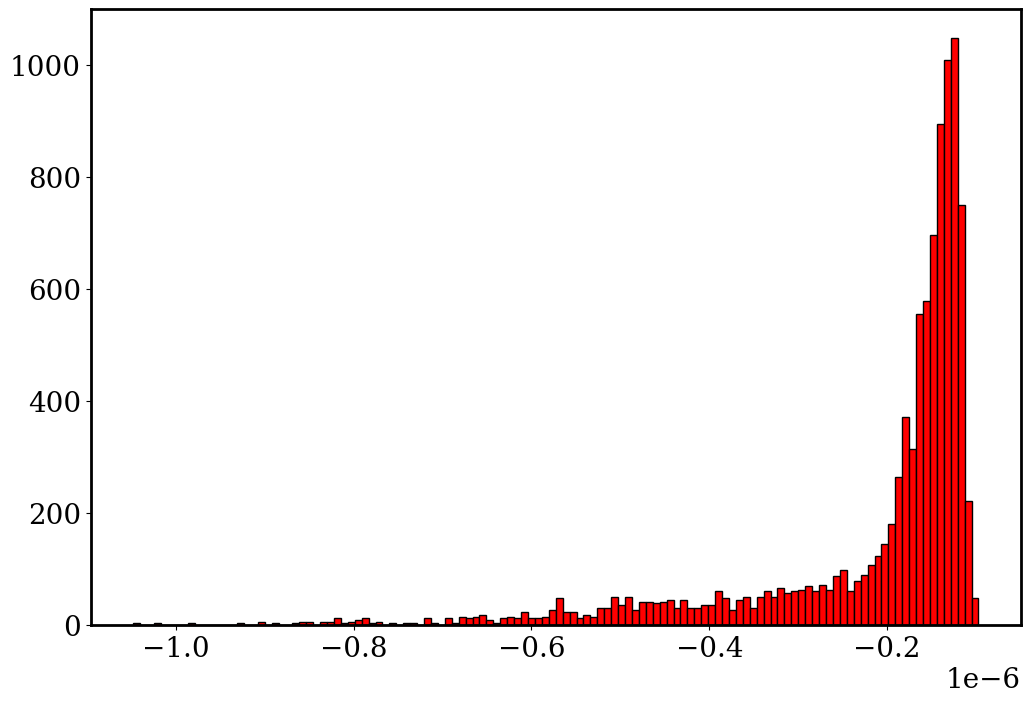

In [184]:
plt.hist(peaks1,int(len(peaks1)/80),color='blue',edgecolor='black')
plt.show()
plt.hist(peaks2,int(len(peaks2)/80),color='red',edgecolor='black')
plt.show()